In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as sm


## Import Data



In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Text(0, 0.5, 'Number of People')

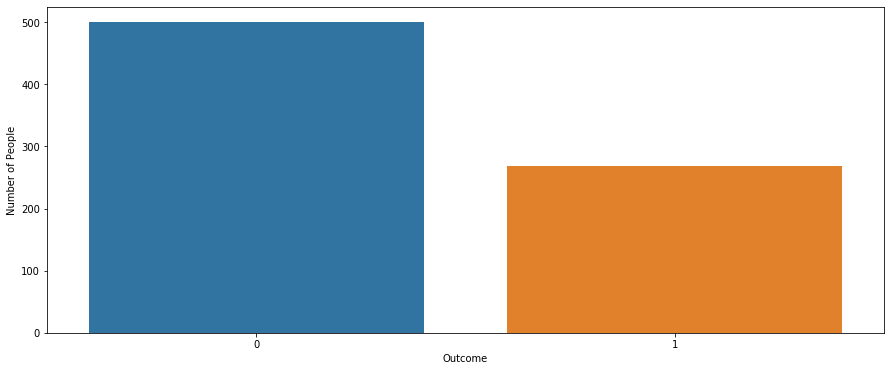

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(df['Outcome'])
plt.ylabel('Number of People')

In [9]:
print('Glucose',df['Glucose'].min())
print('BMI',df['BMI'].min())
print('SkinThickness',df['SkinThickness'].min())
print('BloodPressure',df['BloodPressure'].min())
print('Insulin',df['Insulin'].min())

Glucose 0
BMI 0.0
SkinThickness 0
BloodPressure 0
Insulin 0


In [10]:
missingGlucose = df[df['Glucose'] == 0].shape[0]
print ("Number of zeros in colum Glucose: ", missingGlucose)
missingBP = df[df['BloodPressure'] == 0].shape[0]
print ("Number of zeros in colum BloodPressure: ", missingBP)
missingST = df[df['SkinThickness'] == 0].shape[0]
print ("Number of zeros in colum SkinThickness: ", missingST)
missingInsulin = df[df['Insulin'] == 0].shape[0]
print ("Number of zeros in colum Insulin: ", missingInsulin)
missingBMI = df[df['BMI'] == 0].shape[0]
print ("Number of zeros in colum BMI: ", missingBMI)

Number of zeros in colum Glucose:  5
Number of zeros in colum BloodPressure:  35
Number of zeros in colum SkinThickness:  227
Number of zeros in colum Insulin:  374
Number of zeros in colum BMI:  11


Visualization for understanding the distribution of data for different columns

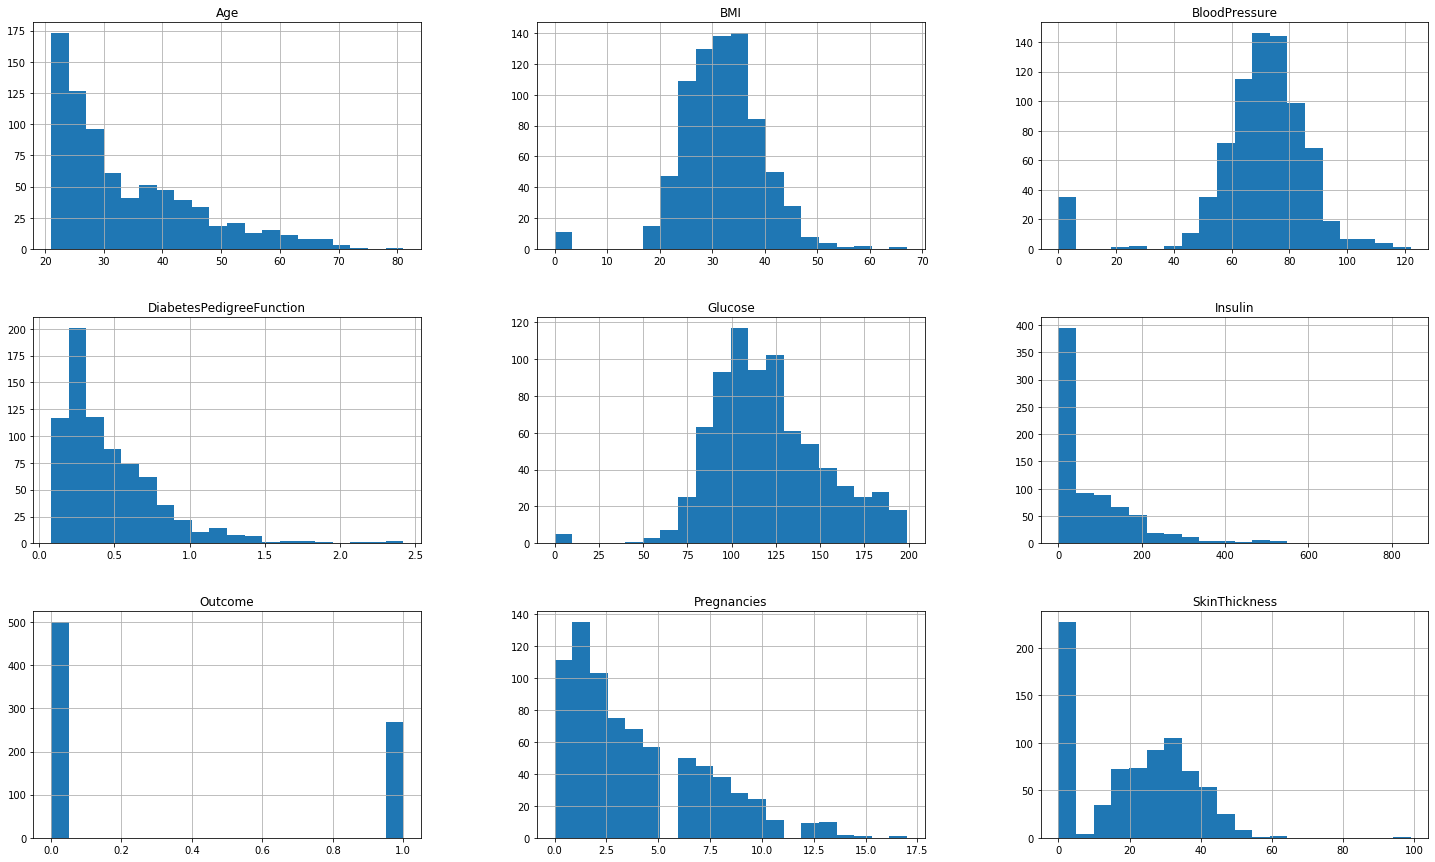

In [11]:
df.hist(bins=20,figsize=(25,15))
plt.show()

Columns 'Age', 'DiabetesPedigreeFunction', 'Pregnancies', 'SkinThickness', 'Insulin' are right skewed that is:

Mean > Median

# DATA CLEANING



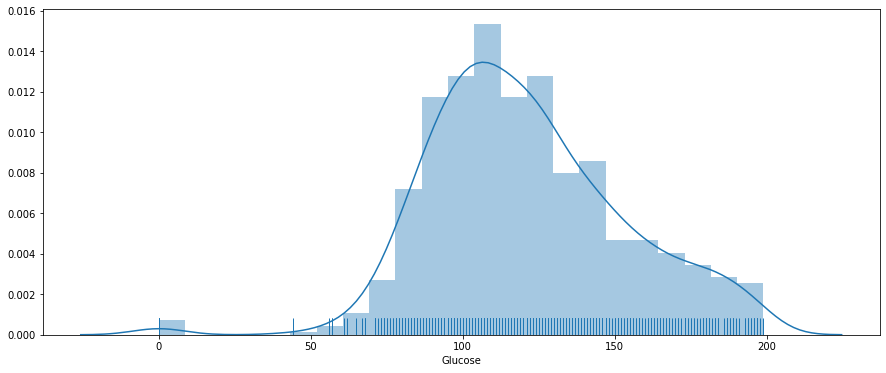

In [12]:
plt.figure(figsize=(15,6))
sns.distplot(df['Glucose'], kde = True, rug = True)


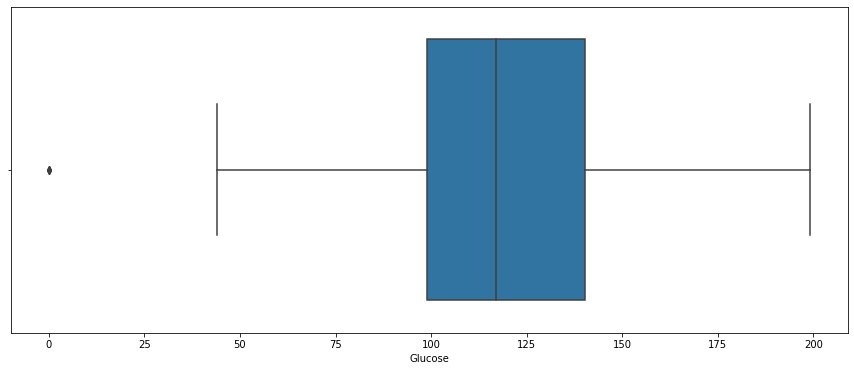

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Glucose'])

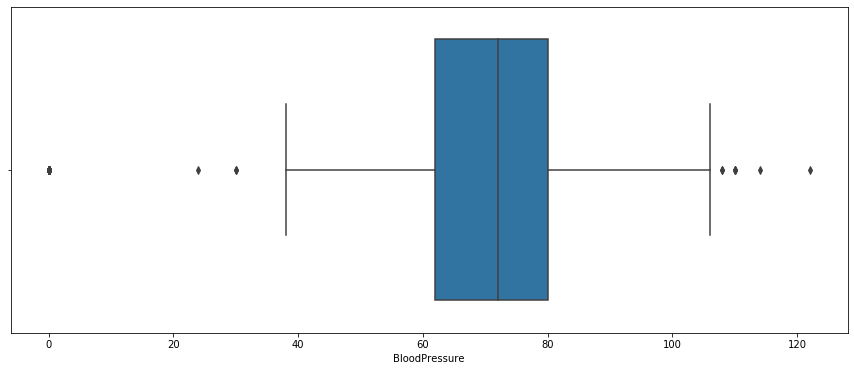

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(df['BloodPressure'])

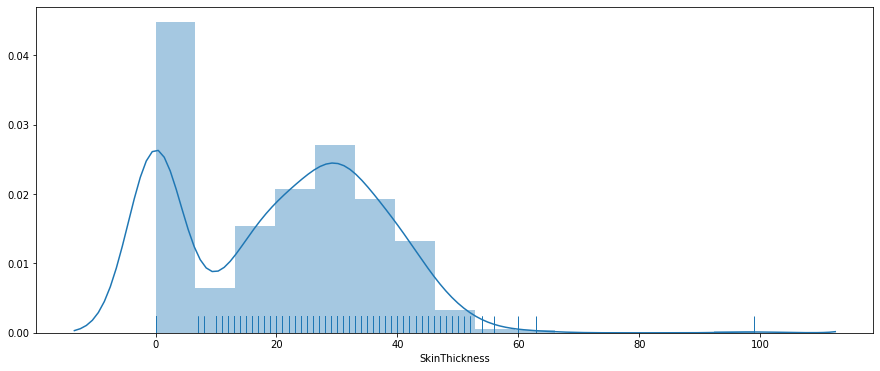

In [15]:
plt.figure(figsize=(15,6))
sns.distplot(df['SkinThickness'], kde = True, rug = True)

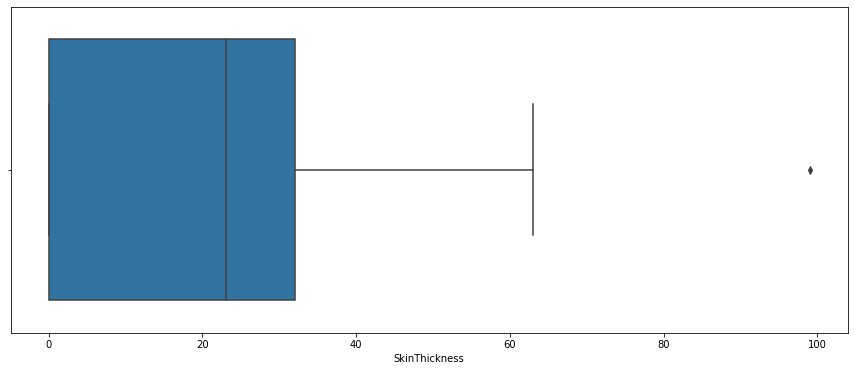

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(df['SkinThickness'])

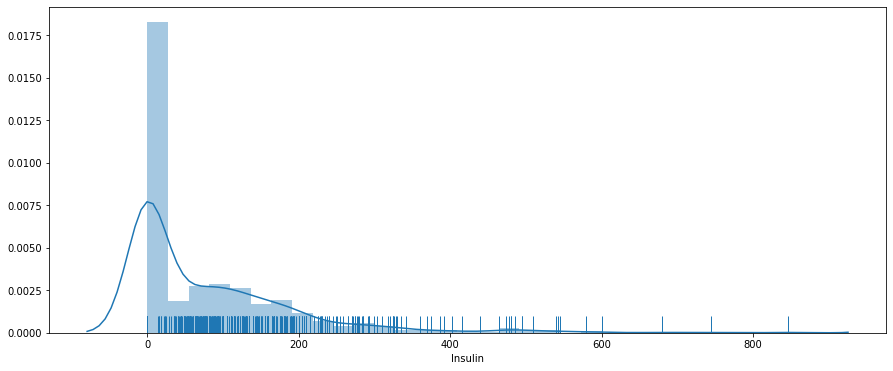

In [17]:
plt.figure(figsize=(15,6))
sns.distplot(df['Insulin'], kde = True, rug = True)


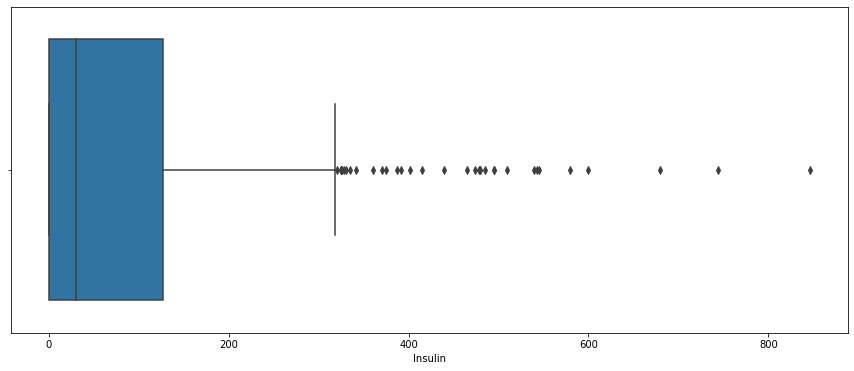

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(df['Insulin'])

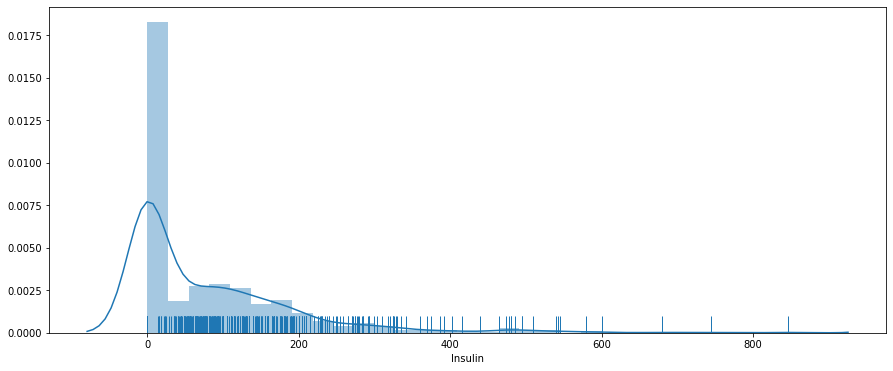

In [19]:
plt.figure(figsize=(15,6))
sns.distplot(df['Insulin'], kde = True, rug = True)


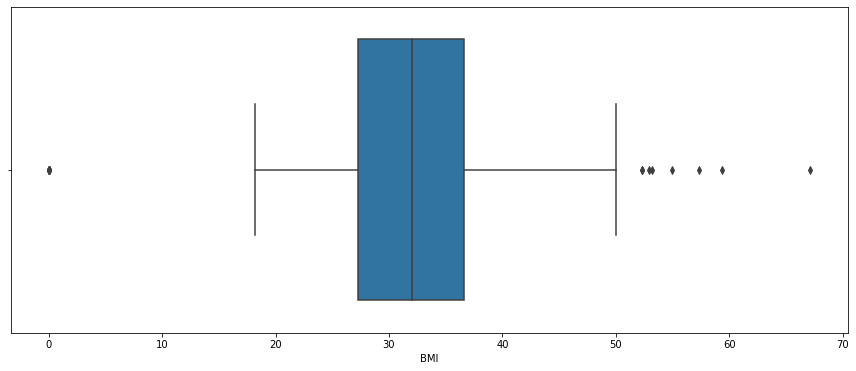

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(df['BMI'])

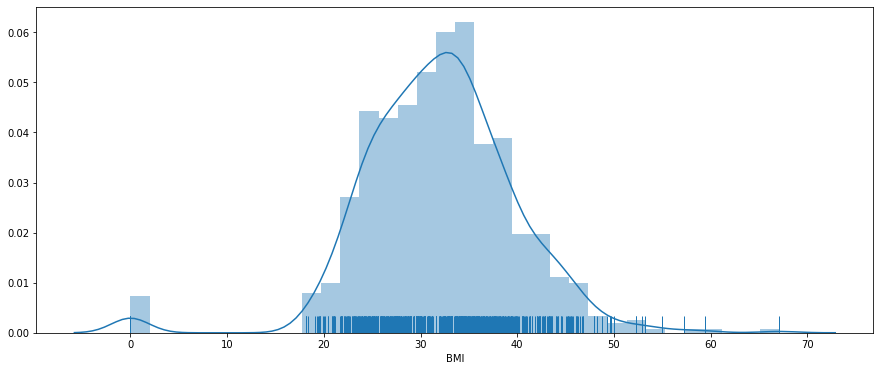

In [21]:
plt.figure(figsize=(15,6))
sns.distplot(df['BMI'], kde = True, rug = True)

In [22]:
# mode for skin thickness returned 0 so I set a condition for values > 0
df['BloodPressure'] = df['BloodPressure'].replace(to_replace=0,value=df.loc[df['BloodPressure'] > 0].mean())
df['Glucose'] = df['Glucose'].replace(to_replace=0,value=df.loc[df['Glucose'] >0].mean())
df['Insulin'] = df['Insulin'].replace(to_replace=0,value=df['Insulin'].median())
df['BMI'] = df['BMI'].replace(to_replace=0,value=df['BMI'].median())
df['SkinThickness'] = (df['SkinThickness'].replace(to_replace=0,value=df
                                                   .loc[df['SkinThickness']>1]['SkinThickness'].mode()[0])
                      )

In [23]:
print('Glucose',df['Glucose'].min())
print('BMI',df['BMI'].min())
print('SkinThickness',df['SkinThickness'].min())
print('BloodPressure',df['BloodPressure'].min())
print('Insulin',df['Insulin'].min())

Glucose 0
BMI 18.2
SkinThickness 7
BloodPressure 0
Insulin 14.0


### Aftermath

In [24]:
missingGlucose = df[df['Glucose'] == 0].shape[0]
print ("Number of zeros in colum Glucose: ", missingGlucose)
missingBP = df[df['BloodPressure'] == 0].shape[0]
print ("Number of zeros in colum BloodPressure: ", missingBP)
missingST = df[df['SkinThickness'] == 0].shape[0]
print ("Number of zeros in colum SkinThickness: ", missingST)
missingInsulin = df[df['Insulin'] == 0].shape[0]
print ("Number of zeros in colum Insulin: ", missingInsulin)
missingBMI = df[df['BMI'] == 0].shape[0]
print ("Number of zeros in colum BMI: ", missingBMI)

Number of zeros in colum Glucose:  5
Number of zeros in colum BloodPressure:  35
Number of zeros in colum SkinThickness:  0
Number of zeros in colum Insulin:  0
Number of zeros in colum BMI:  0


# Visualization



In [25]:
df = df.assign(glucose_over_skin_ratio=lambda x: round(x.Glucose / x.SkinThickness, 2))

In [26]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,glucose_over_skin_ratio
Outcome,,,,,,,,,
0,3.298000,109.980000,68.184000,28.560000,83.188000,30.880200,0.429734,31.190000,4.323100
1,4.865672,141.257463,70.824627,32.671642,116.041045,35.381343,0.550500,37.067164,4.635485


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_over_skin_ratio
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.994792,94.652344,32.450911,0.471876,33.240885,0.348958,4.432109
std,3.369578,31.972618,19.355807,8.886506,105.547598,6.875366,0.331329,11.760232,0.476951,1.968182
min,0.000000,0.000000,0.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,30.500000,27.500000,0.243750,24.000000,0.000000,3.205000
50%,3.000000,117.000000,72.000000,32.000000,31.250000,32.000000,0.372500,29.000000,0.000000,3.970000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,5.210000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,18.430000


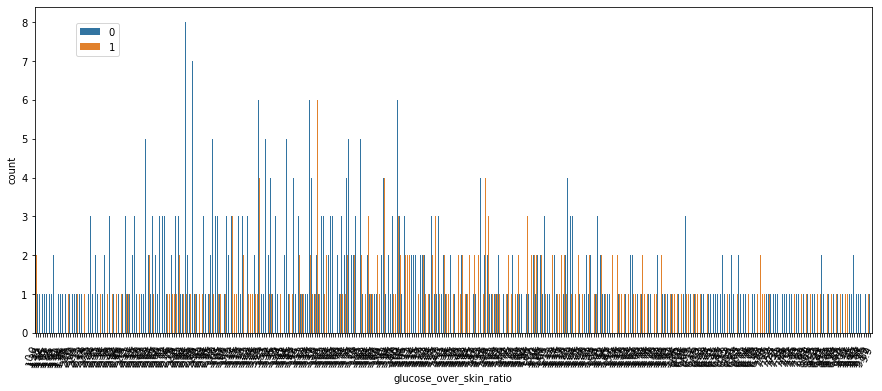

In [28]:
plt.figure(figsize=(15,6))
g = sns.countplot(x = 'glucose_over_skin_ratio', hue = 'Outcome', data = df.loc[df.glucose_over_skin_ratio < 10])
           
plt.setp(g.get_xticklabels(), rotation_mode="anchor", ha="right", va="center")
plt.setp(g.get_xticklabels(), rotation=65, y=-0.02)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.show()

In [29]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,glucose_over_skin_ratio
Pregnancies,1.000000,0.129459,0.141282,0.104428,-0.055697,0.021546,-0.033523,0.544341,0.221898,-0.042749
Glucose,0.129459,1.000000,0.152590,0.188068,0.355252,0.218806,0.137337,0.263514,0.466581,0.425962
BloodPressure,0.141282,0.152590,1.000000,0.097693,0.085221,0.184220,0.041265,0.239528,0.065068,0.033997
SkinThickness,0.104428,0.188068,0.097693,1.000000,0.065186,0.522159,0.077395,0.158825,0.220678,-0.689950
Insulin,-0.055697,0.355252,0.085221,0.065186,1.000000,0.189022,0.178029,-0.015413,0.148457,0.216179
BMI,0.021546,0.218806,0.184220,0.522159,0.189022,1.000000,0.153506,0.025744,0.312249,-0.285994
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.077395,0.178029,0.153506,1.000000,0.033561,0.173844,0.059100
Age,0.544341,0.263514,0.239528,0.158825,-0.015413,0.025744,0.033561,1.000000,0.238356,0.013728
Outcome,0.221898,0.466581,0.065068,0.220678,0.148457,0.312249,0.173844,0.238356,1.000000,0.075701
glucose_over_skin_ratio,-0.042749,0.425962,0.033997,-0.689950,0.216179,-0.285994,0.059100,0.013728,0.075701,1.000000


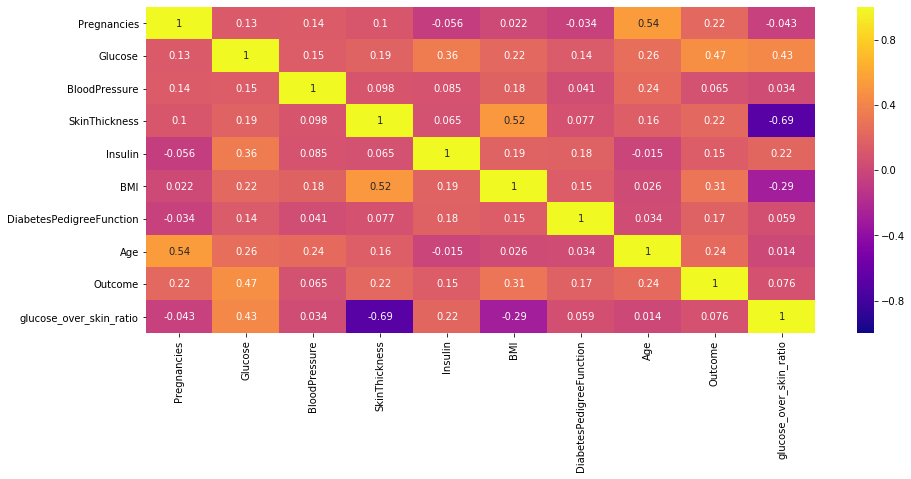

In [30]:
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap = 'plasma', vmin = -1, vmax = 1)


In [31]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Glucose vs Outcome

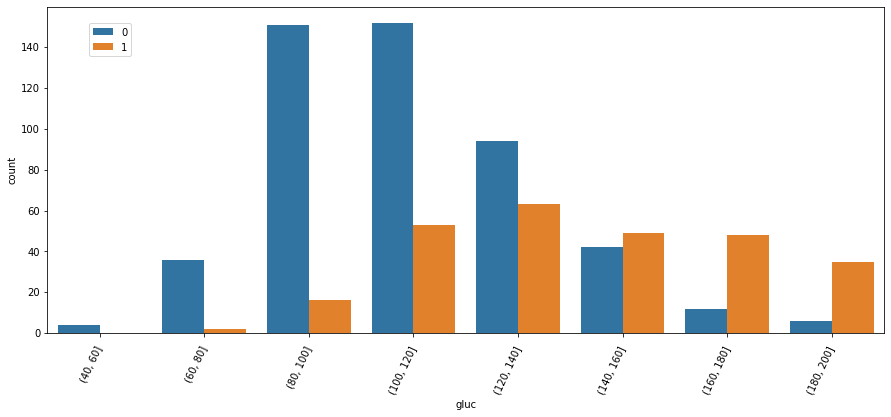

In [32]:
plt.figure(figsize=(15,6))
df['gluc'] = pd.cut(df.Glucose,[40,60,80,100,120,140,160,180,200])
g = sns.countplot(x = 'gluc', hue = 'Outcome', data = df)
           
plt.setp(g.get_xticklabels(), rotation_mode="anchor", ha="right", va="center")
plt.setp(g.get_xticklabels(), rotation=65, y=-0.02)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.show()

In [33]:
print('Average Glucose for Pima woman who has diabetes: ', df[df['Outcome'] == 1]['Glucose'].mean())
print('Average Glucose for Pima woman who does not have diabetes: ', df[df['Outcome'] == 0]['Glucose'].mean())

Average Glucose for Pima woman who has diabetes:  141.25746268656715
Average Glucose for Pima woman who does not have diabetes:  109.98


BMI vs.Outcome

In [34]:
df.BMI.describe()

count    768.000000
mean      32.450911
std        6.875366
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

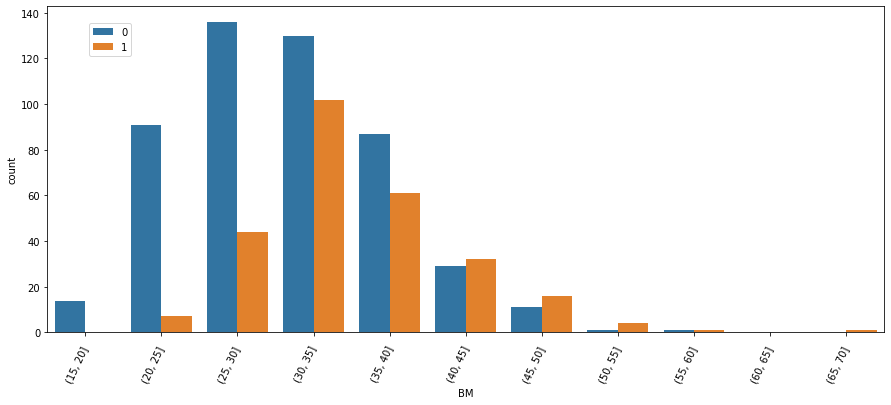

In [35]:
plt.figure(figsize=(15,6))
df['BM'] = pd.cut(df.BMI,[15,20,25,30,35,40,45,50,55,60,65,70])
g = sns.countplot(x = 'BM', hue = 'Outcome', data = df)
           
plt.setp(g.get_xticklabels(), rotation_mode="anchor", ha="right", va="center")
plt.setp(g.get_xticklabels(), rotation=65, y=-0.02)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.show()

In [36]:
print('Average BMI for Pima woman who has diabetes: ', df[df['Outcome'] == 1]['BMI'].mean())
print('Average BMI for Pima woman who does not have diabetes: ', df[df['Outcome'] == 0]['BMI'].mean())

Average BMI for Pima woman who has diabetes:  35.38134328358204
Average BMI for Pima woman who does not have diabetes:  30.88019999999996


Age vs. Outcome

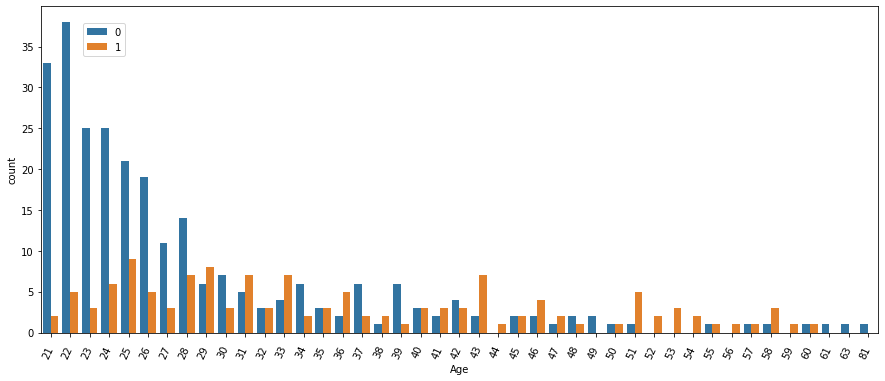

In [37]:
plt.figure(figsize=(15,6))
g = sns.countplot(x = 'Age', hue = 'Outcome', data = df.loc[df['Insulin'] != 30.5])
           
plt.setp(g.get_xticklabels(), rotation_mode="anchor", ha="right", va="center")
plt.setp(g.get_xticklabels(), rotation=65, y=-0.02)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.show()

Text(0, 0.5, 'Outcome')

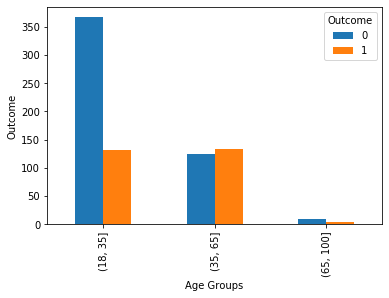

In [38]:
bins = [0,13,18,35,65,100]
df['age_bin'] = pd.cut(df.Age,bins)
pd.crosstab(df.age_bin, df.Outcome).plot(kind='bar');
plt.xlabel('Age Groups')
plt.ylabel('Outcome')

Text(0, 0.5, 'Outcome')

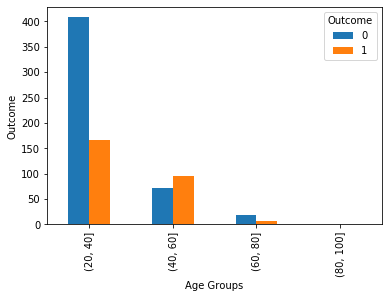

In [39]:
bins = [0,20,40,60,80,100]
df['age_bin'] = pd.cut(df.Age,bins)
pd.crosstab(df.age_bin, df.Outcome).plot(kind='bar');
plt.xlabel('Age Groups')
plt.ylabel('Outcome')

In [40]:
age_min = df[df['Outcome'] == 1]
print("Minimum age of Pima woman who has Diabetes: ",age_min['Age'].min())
print("Maximum age of Pima woman who has Diabetes: ",age_min['Age'].max())
age_zero = df[df['Outcome'] == 0]
print("Minimum age of Pima women who do not have Diabetes: ",age_zero['Age'].min())
print("Maximum age of Pima women who do not have Diabetes: ",age_zero['Age'].max())
print('Average Age of Pima women who have diabetes: ',df[df['Outcome'] == 1]['Age'].mean())
print('Average Age of Pima women who do not have diabetes: ',df[df['Outcome'] == 0]['Age'].mean())

Minimum age of Pima woman who has Diabetes:  21
Maximum age of Pima woman who has Diabetes:  70
Minimum age of Pima women who do not have Diabetes:  21
Maximum age of Pima women who do not have Diabetes:  81
Average Age of Pima women who have diabetes:  37.06716417910448
Average Age of Pima women who do not have diabetes:  31.19


Pregnancies vs. Outcome

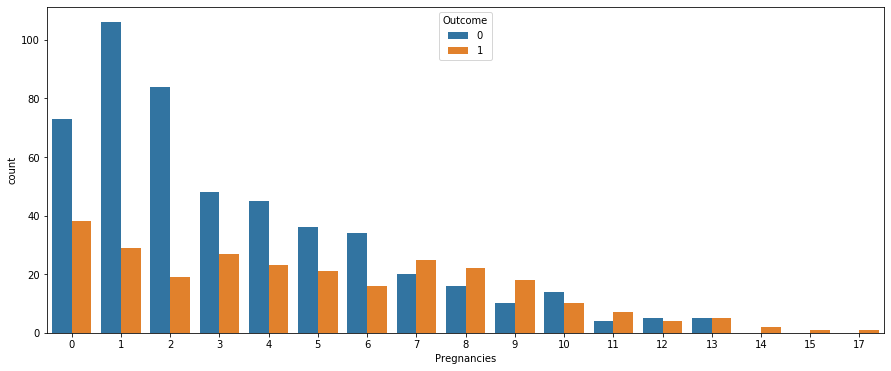

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = df)

Skin Thickness vs Outcome

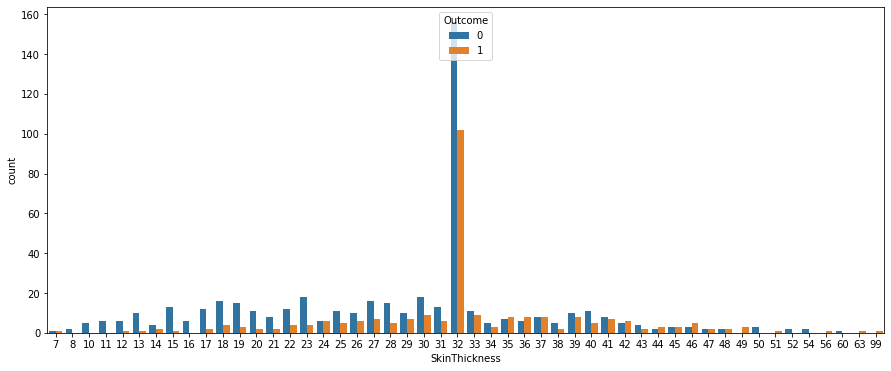

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'SkinThickness', hue = 'Outcome', data = df)

In [43]:
print('Average Insulin level for Pima women who have diabetes: ', df[df['Outcome'] == 1]['Insulin'].mean())
print('Average Isulin level for Pima women who do not have diabetes: ', df[df['Outcome'] == 0]['Insulin'].mean())

Average Insulin level for Pima women who have diabetes:  116.0410447761194
Average Isulin level for Pima women who do not have diabetes:  83.188


In [44]:
df['Insulin'].mode()

0    30.5
dtype: float64

In [45]:
df.Insulin.describe()

count    768.000000
mean      94.652344
std      105.547598
min       14.000000
25%       30.500000
50%       31.250000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

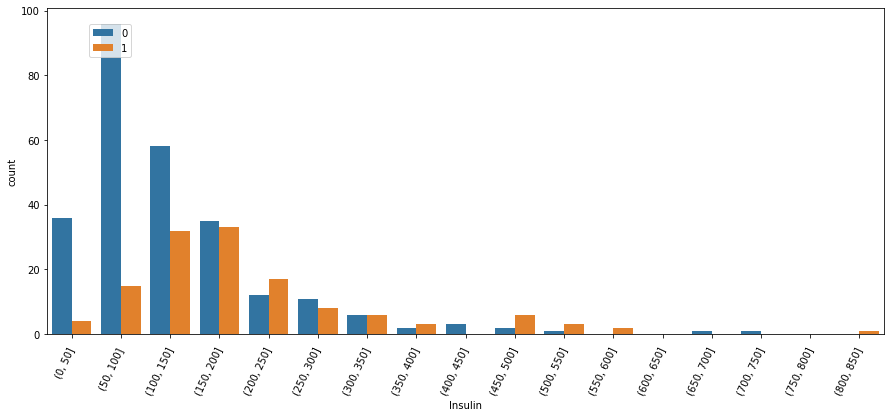

In [46]:
plt.figure(figsize=(15,6))
df['In'] = pd.cut(df.Insulin,[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850])
g = sns.countplot(x = 'In', hue = 'Outcome', data = df.loc[df['Insulin'] != 30.5])
           
plt.setp(g.get_xticklabels(), rotation_mode="anchor", ha="right", va="center")
plt.setp(g.get_xticklabels(), rotation=65, y=-0.02)
plt.xlabel('Insulin')
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.show()

idk what to make of this ^

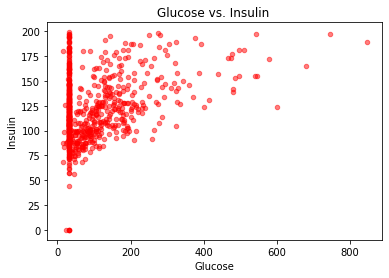

In [47]:
df.plot(kind='scatter', x='Insulin', y='Glucose',alpha = 0.5,color = 'red')
plt.xlabel('Glucose')              
plt.ylabel('Insulin')
plt.title('Glucose vs. Insulin ')            
plt.show()

In [48]:
df.DiabetesPedigreeFunction.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

Text(0.5, 0, 'Diabetes Pedigree')

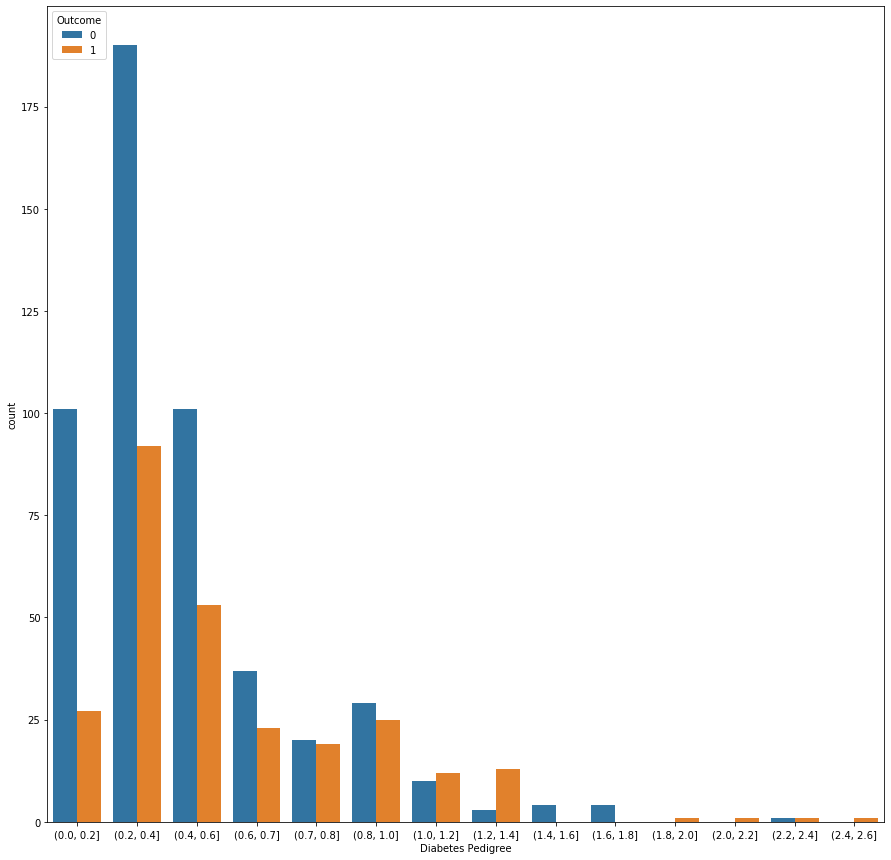

In [49]:
plt.figure(figsize=(15,15))
df['pedig'] = pd.cut(df.DiabetesPedigreeFunction,[0,0.2,0.4,0.6,0.7,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6])
sns.countplot(x ='pedig',hue = 'Outcome', data = df)
plt.xlabel('Diabetes Pedigree')


In [50]:
print('Average Value of DiabeticPedigreeFunction for Pima women who do not have diabetes: ', df[df['Outcome'] == 0]['DiabetesPedigreeFunction'].mean())
print('Average Value of DiabeticPedigreeFunction for Pima women who have diabetes: ', df[df['Outcome'] == 1]['DiabetesPedigreeFunction'].mean())


Average Value of DiabeticPedigreeFunction for Pima women who do not have diabetes:  0.42973400000000017
Average Value of DiabeticPedigreeFunction for Pima women who have diabetes:  0.5505


#### Blood Pressure

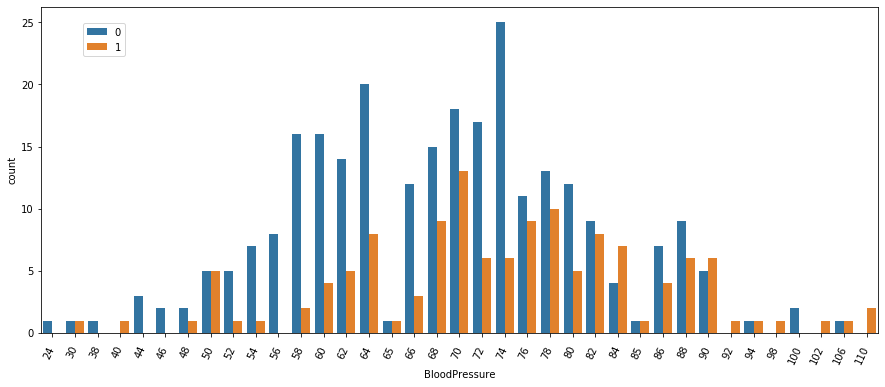

In [51]:
plt.figure(figsize=(15,6))
g = sns.countplot(x = 'BloodPressure', hue = 'Outcome', data = df.loc[df['Insulin'] != 30.5])
           
plt.setp(g.get_xticklabels(), rotation_mode="anchor", ha="right", va="center")
plt.setp(g.get_xticklabels(), rotation=65, y=-0.02)
plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.show()

## Modeling

In [52]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'glucose_over_skin_ratio', 'gluc', 'BM', 'age_bin', 'In', 'pedig'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

In [54]:
X = df[feature_columns].values
y = df[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [55]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [56]:
from sklearn import metrics
predict_train_data = random_forest_model.predict(X_test)

metrics.accuracy_score(y_test, predict_train_data)

0.7489177489177489

random forest^


In [57]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector 

In [58]:
print(all_accuracies)


[0.77981651 0.76635514 0.70093458 0.77570093 0.79439252]


In [59]:
print(all_accuracies.mean())


0.7634399382663123


In [60]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [61]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [62]:
gd_sr.fit(X_train, y_train)



C:\Users\Sineth\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

In [63]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


In [64]:
best_result = gd_sr.best_score_
print(best_result)

0.7653631284916201


In [65]:
# re run with new cv gs model
predict_train_data = gd_sr.predict(X_test)

In [66]:
# feature importance 

feature_importances = random_forest_model.feature_importances_
feature_importances

array([0.09409344, 0.25171754, 0.09172261, 0.07180919, 0.08355586,
       0.16035883, 0.10782245, 0.13892007])

In [79]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, predict_train_data)

Pregnancies                 0.094093
Glucose                     0.251718
BloodPressure               0.091723
SkinThickness               0.071809
Insulin                     0.083556
BMI                         0.160359
DiabetesPedigreeFunction    0.107822
Age                         0.138920
dtype: float64

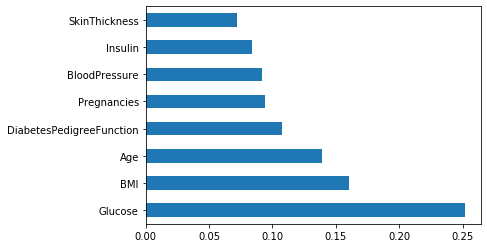

In [80]:
feat_importances = pd.Series(random_forest_model.feature_importances_, index=df[feature_columns].columns)
feat_importances.nlargest(8).plot(kind='barh')
feat_importances

<Figure size 432x288 with 0 Axes>

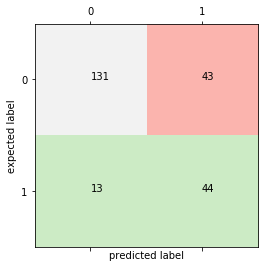

In [86]:
plt.figure()
plt.matshow(con_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, con_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()